In [ ]:
# Importação das bibliotecas
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
train_dir = "C:/Users/jorge/Desktop/DanosV4/training"
val_dir = "C:/Users/jorge/Desktop/DanosV4/validation"

In [3]:
# Definição das categorias
categories = ["Minor", "Severe"]

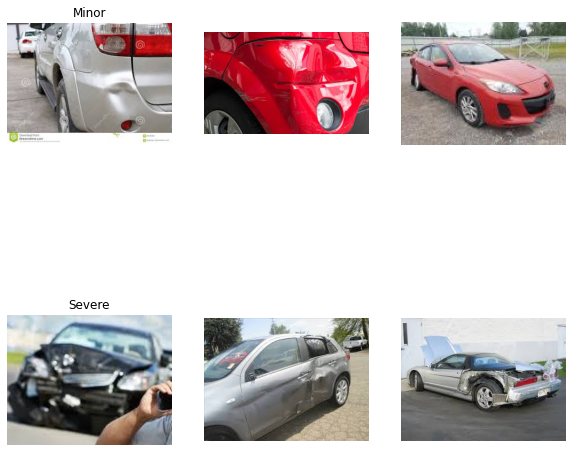

In [32]:
# Plottar 3 imagens aleatórias de cada categoria

fig, axs = plt.subplots(2, 3, figsize=(10, 10))
for i, category in enumerate(categories):
    for j in range(3):
        file = random.choice(os.listdir(os.path.join(train_dir, category)))
        img = plt.imread(os.path.join(train_dir, category, file))
        axs[i, j].imshow(img)
        axs[i, j].axis("off")
        if j == 0:
            axs[i, j].set_title(category)

plt.show()

In [5]:
# Definir arquitetura do modelo
model = keras.Sequential([
    layers.Conv2D(16, 2, activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 2, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 2, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [6]:
# Compilação do modelo
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define os geradores para treino e validação
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)



In [19]:
# Definição do batch size e tamanho de imagem
batch_size = 10
img_size = (256, 256)

# "Chamando" as imagens de treino e validação das respetivas pastas
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1383 images belonging to 2 classes.
Found 248 images belonging to 2 classes.


In [27]:
#Treinar o modelo
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator
)

Epoch 1/30
139/139 [==============================] - 62s 447ms/step - loss: 0.4930 - accuracy: 0.7686 - val_loss: 0.4385 - val_accuracy: 0.8226
Epoch 2/30
139/139 [==============================] - 41s 292ms/step - loss: 0.4905 - accuracy: 0.7802 - val_loss: 0.4083 - val_accuracy: 0.8266
Epoch 3/30
139/139 [==============================] - 41s 297ms/step - loss: 0.4761 - accuracy: 0.7889 - val_loss: 0.4507 - val_accuracy: 0.8347
Epoch 4/30
139/139 [==============================] - 41s 296ms/step - loss: 0.4978 - accuracy: 0.7816 - val_loss: 0.4202 - val_accuracy: 0.8306
Epoch 5/30
139/139 [==============================] - 42s 302ms/step - loss: 0.4798 - accuracy: 0.7954 - val_loss: 0.4290 - val_accuracy: 0.8387
Epoch 6/30
139/139 [==============================] - 42s 303ms/step - loss: 0.4753 - accuracy: 0.7889 - val_loss: 0.7532 - val_accuracy: 0.7581
Epoch 7/30
139/139 [==============================] - 44s 317ms/step - loss: 0.4809 - accuracy: 0.7867 - val_loss: 0.4395 - val_ac

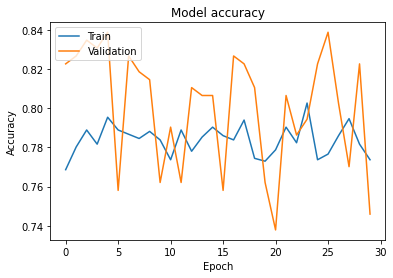

In [28]:
# Gráfico Accuracy Train vs Accuracy Validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

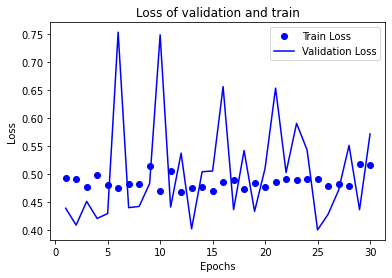

In [29]:
# Gráfico Training Loss vs Validation Loss
dic_history = history.history

loss = dic_history['loss']
val_loss = dic_history['val_loss']

epochs = range(1, len(val_loss)+1)

plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Loss of validation and train')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()